## Student Name: Liyanze Liu
## Student Number: 1009172324

In [37]:
# Importing libraries
import pandas as pd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pingouin
import pingouin as pg

In [38]:
# Loading the data from CSV
df_a4=pd.read_csv("INF2178_A4_data.csv")

# Displaying the few rows to the df_a3
df_a4.head(4)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010


In [39]:
a4_cleaned = df_a4.dropna(subset=['SES', 'MMSE'])

a4_cleaned.head(4)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462


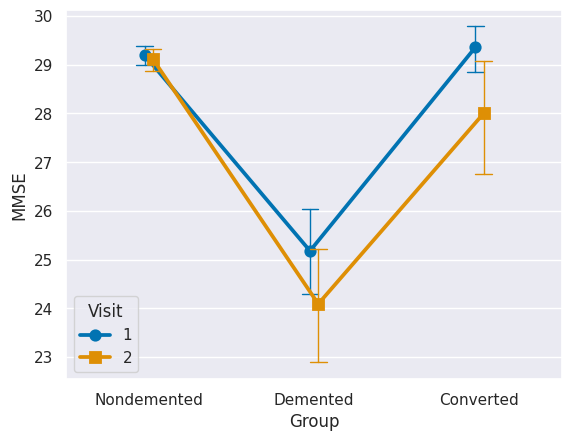

In [40]:
sns.set()
sns.pointplot(data=a4_cleaned, x='Group', y='MMSE', hue='Visit', dodge=True, markers=['o', 's'], capsize=.1, err_kws={'linewidth': 1}, palette='colorblind')
plt.show()

In [41]:
a4_cleaned.groupby(['Group', 'Visit'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Group       Visit             
Converted   1      29.36  0.93
            2      28.00  2.09
Demented    1      25.18  3.42
            2      24.09  4.49
Nondemented 1      29.19  0.85
            2      29.11  0.96

In [42]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=a4_cleaned)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1325.778      2    134  662.889  56.575    0.000  0.458  nan
Visit          21.639      1    134   21.639   9.001    0.003  0.063    1.000
Interaction    17.716      2    134    8.858   3.685    0.028  0.052  nan



In [43]:
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group',
                              subject='Subject ID', data=a4_cleaned)
pg.print_table(posthocs)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc               BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  -----------------  --------
Visit          -        1          2            True      True           2.943  136.000  two-sided        0.004              5.825     0.163
Group          -        Converted  Demented     False     True           6.630   53.218  two-sided        0.000         980900.000     1.185
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216              0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.032   57.340  two-sided        0.000  1661000000000.000    -1.810
Visit * Group  1        Converted  Demented     False     True           7.808   60.119  two-sided        0.000       86210000.000     1.

In [44]:
# Conducting a post-hoc power analysis
alpha = 0.05
power = 0.91
effect_size = 0.7

obj = TTestIndPower()
n = obj.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))

Sample size/Number needed in each group: 45.451


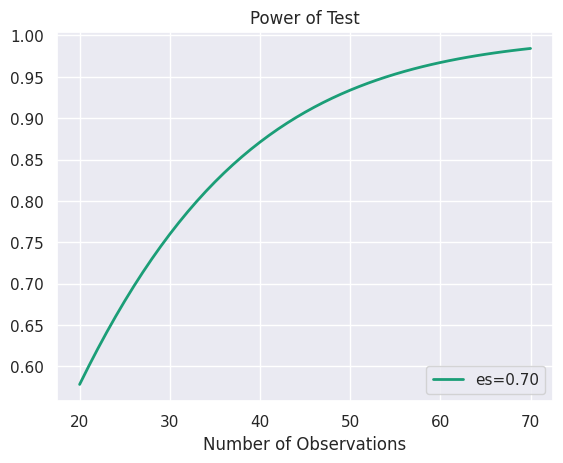

In [45]:
# Power curves
# Power analysis varying parameters
effect_size = 0.7
# Choose a range that extends both below and above the calculated sample size of approximately 45
# Here we start at 20 and go up to 70 in increments of 1
sample_sizes = np.array(range(20, 71))

# Plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=[effect_size])

plt.show()